In [19]:
from docx import Document

# Load the Word document
doc = Document('data.docx')

# Initialize an empty list to store the split information
split_data = []

# Iterate through each paragraph in the document
for para in doc.paragraphs:
    # Get the text and split it by '|'
    split_paragraph = para.text.split('|')
    
    # Append each split part to the array
    split_data.extend(split_paragraph)

split_data = split_data[3:]

In [20]:
import ast

def parse_2d_array_from_string(data_string):
    # Safely evaluate the string to convert it into a Python object (list)
    return ast.literal_eval(data_string)
control_points = split_data[0:15]
weights = split_data[29:-1]

# Parse each element in split_data into a 2D array
weights = [parse_2d_array_from_string(data) for data in weights]
control_points = [parse_2d_array_from_string(data) for data in control_points]


In [21]:
len(weights)

30

In [22]:
len(control_points)

15

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\mechadmin\Documents\GitHub\pyiga\.venv\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['identity', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


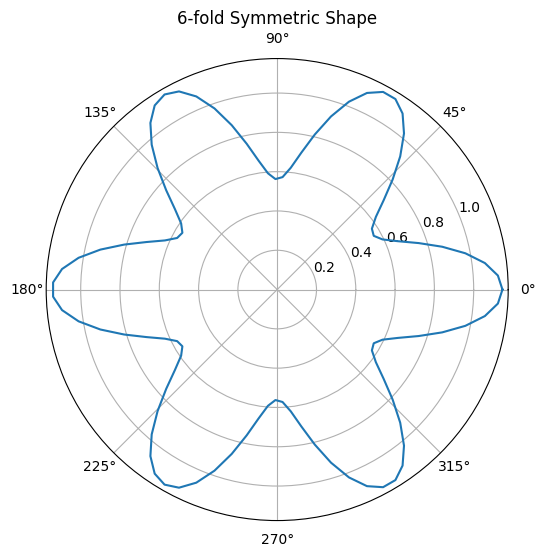

In [23]:
# %matplotlib inline
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
import matplotlib.pyplot as plt
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(theta, r, d, n, a, L0):
    c = cal_c(r,a,L0)
    return c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
d = 0.8
r = 0.4
n = 6
a = 0.1
L0 = 25
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
theta_values = np.linspace(0, 2 * np.pi, 100)
result = superformula(theta_values, r, d, n, a, L0)
plt.figure(figsize=(6, 6))
plt.polar(theta_values, result)
plt.title(f"{n}-fold Symmetric Shape")
plt.show()
# print(polar_to_cartesian(result, theta_values))

(1, 64)
(1, 64)
(64, 2)
(1, 64)
(64,)
(64,)


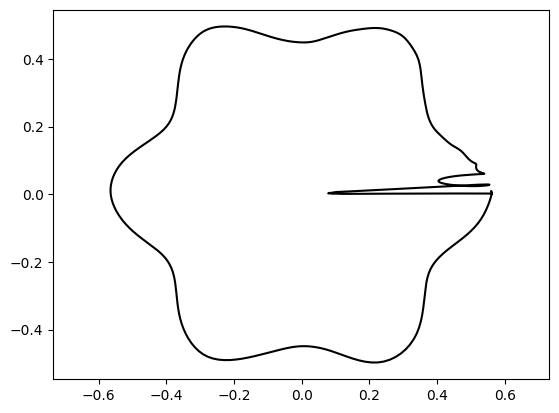

In [29]:
from pyiga.geometry import *
from pyiga import approx, bspline
nn = 14
ctlpts = np.array(control_points[nn])
weight = np.array(weights[nn])
print(weight.shape)
# ctlpts = np.hstack([ctlpts, ctlpts[:, 0].reshape(2, 1)])
# weight = np.append(weight, weight[0][0])
print(weight.shape)
n_kv = 61
kv = bspline.make_knots(3, 0.0, 1.0, n_kv)
coeff = ctlpts.transpose()
grid = (np.linspace(0.0, 1.0, 100),)
print(coeff.shape)
print(weight.shape)
weight = weight.transpose().reshape(64)
print(weight.shape)
N = tuple(kv.numdofs for kv in (kv,))
# print(N)
nurbs = NurbsFunc((kv,), coeff.copy(), weights=weight)
vals = nurbs.grid_eval(grid)

vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
axis('equal');


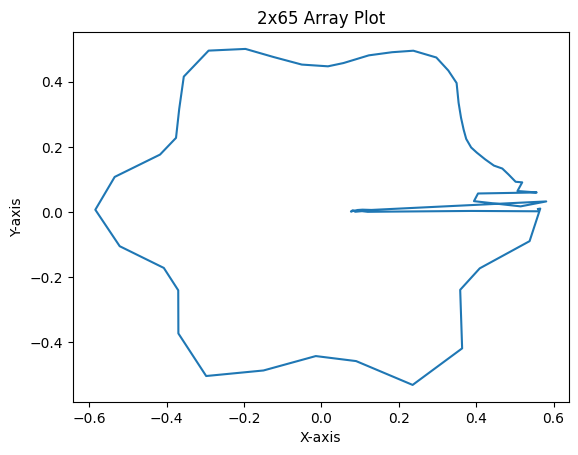

In [36]:
# Plot the data
plt.plot(ctlpts[0], ctlpts[1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x65 Array Plot')

# Show the plot
plt.show()

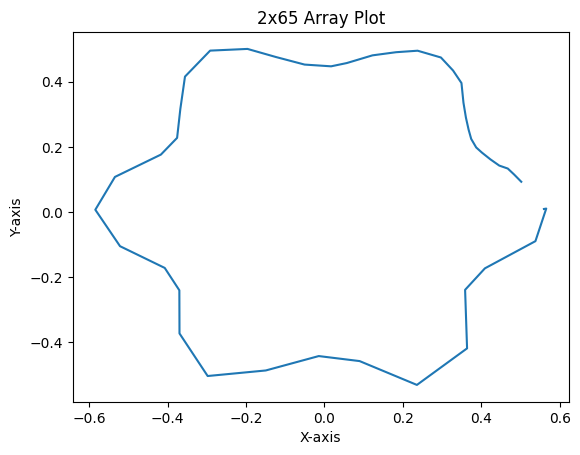

In [35]:
# Plot the data
plt.plot(ctlpts[0][20:], ctlpts[1][20:])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x65 Array Plot')

# Show the plot
plt.show()

In [40]:
ctlpts[0][20:]

array([ 0.50200981,  0.48373193,  0.46762121,  0.44593489,  0.4234606 ,
        0.40174454,  0.38710073,  0.37434492,  0.36777952,  0.36091837,
        0.35462037,  0.34952697,  0.32812774,  0.29713097,  0.23769888,
        0.18280362,  0.12265193,  0.05717714,  0.01712914, -0.0504779 ,
       -0.12354282, -0.19607113, -0.29128236, -0.35543358, -0.36728382,
       -0.37554431, -0.41680875, -0.53403586, -0.58405745, -0.52104306,
       -0.40708885, -0.36979318, -0.36943877, -0.29759729, -0.1494651 ,
       -0.01435934,  0.08980002,  0.23589455,  0.36381775,  0.35879856,
        0.40933746,  0.53812093,  0.56566584,  0.55980444])

In [46]:
arr = np.load('C:\\Users\\mechadmin\\Documents\\GitHub\\pyiga\\EGAN\\data\\train2.npy')

In [44]:
arr.shape

(1200, 100, 2)

In [47]:
arr[0]

array([[ 6.93599122e-01,  0.00000000e+00],
       [ 6.93411479e-01,  1.14071219e-02],
       [ 6.92848754e-01,  2.28019005e-02],
       [ 6.91911555e-01,  3.41720059e-02],
       [ 6.90600897e-01,  4.55051350e-02],
       [ 6.88918198e-01,  5.67890245e-02],
       [ 6.86865278e-01,  6.80114645e-02],
       [ 6.84444359e-01,  7.91603116e-02],
       [ 6.81658061e-01,  9.02235020e-02],
       [ 6.78509399e-01,  1.01189065e-01],
       [ 6.75001779e-01,  1.12045134e-01],
       [ 6.71138997e-01,  1.22779963e-01],
       [ 6.66925233e-01,  1.33381936e-01],
       [ 6.62365046e-01,  1.43839581e-01],
       [ 6.57463372e-01,  1.54141582e-01],
       [ 6.52225513e-01,  1.64276792e-01],
       [ 6.46657138e-01,  1.74234243e-01],
       [ 6.40764271e-01,  1.84003161e-01],
       [ 6.34553290e-01,  1.93572976e-01],
       [ 6.28030915e-01,  2.02933332e-01],
       [ 6.21204203e-01,  2.12074100e-01],
       [ 6.14080543e-01,  2.20985391e-01],
       [ 6.06667641e-01,  2.29657560e-01],
       [ 5.

In [51]:
superformula_points[0][0]

array([1.473192+0.j, 0.      +0.j])

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
# Superformula generation function
def superformula(m, n1, n2, n3, a=1, b=1, num_points=500):
    phi = np.linspace(0, 2 * np.pi, num_points)
    r = (np.abs(np.cos(m * phi / 4) / a)**n2 + np.abs(np.sin(m * phi / 4) / b)**n3)**(-1 / n1)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return np.vstack((x, y)).T


# Generate a dataset of superformula points
superformula_params = [(m, n1, n2, n3) for m in range(1, 10) for n1 in range(1, 5) for n2 in range(1, 5) for n3 in range(1, 5)]
superformula_points = [superformula(*params) for params in superformula_params]

def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(r, L0, n, a=0.5, d=1, num_res=100):
    theta = np.linspace(0, 2 * np.pi, num_res)
    c = cal_c(r,a,L0)
    result = c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return np.vstack((x, y)).T

# Generate a dataset of superformula points
superformula_params = [(round(r, 2), L0, n, (round(a, 2))) for r in np.arange(0.2, 0.9, 0.1).tolist() for L0 in np.arange(15, 35, 5).tolist()
                       for n in np.arange(2, 12, 1).tolist() for a in np.arange(0.2, 0.7, 0.1).tolist()]
superformula_points = np.array([superformula(*params) for params in superformula_params])
print(superformula_points[0])